<a href="https://colab.research.google.com/github/Amcalstrings/Jupiter-Notebook-Google-Trends-and-Data-Visualization/blob/main/Google_Trends_and_Data_Visualisation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate?

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [79]:
df_tesla = pd.read_csv('/content/data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('/content/data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('/content/data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('/content/data/UE Benefits Search vs UE Rate 2004-19.csv')

In [80]:
df_unemployment.sort_values("MONTH", ascending=False)

df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


# Data Exploration

### Tesla

**Goal**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li>
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [81]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [82]:
print(f'Largest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla["TSLA_WEB_SEARCH"].min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [83]:
df_tesla

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766000
1,2010-07-01,3,3.988000
2,2010-08-01,2,3.896000
3,2010-09-01,2,4.082000
4,2010-10-01,2,4.368000
...,...,...,...
119,2020-05-01,16,167.000000
120,2020-06-01,17,215.962006
121,2020-07-01,24,286.152008
122,2020-08-01,23,498.320007


### Unemployment Data

In [84]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [85]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment["UE_BENEFITS_WEB_SEARCH"].max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


### Bitcoin

In [86]:
df_btc_search.describe()

,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [87]:
print(f'largest BTC News Search: {df_btc_search["BTC_NEWS_SEARCH"].max()}')

largest BTC News Search: 100


# Data Cleaning

### Check for Missing Values

**Goal**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [88]:
df_unemployment.isna().any()

MONTH                     False
UE_BENEFITS_WEB_SEARCH    False
UNRATE                    False
dtype: bool

In [89]:
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [90]:
df_btc_price.isna().values.any().sum()

1

In [91]:
print(f'Missing values for BTC price?: {df_btc_price.isna().values.any()}')

Missing values for BTC price?: True


In [92]:
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

Number of missing values: 2


**Goal**: Remove any missing values that you found.

In [93]:
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Goal**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings to Datetime objects for all 4 DataFrames.

In [94]:
df_tesla['MONTH'] = pd.to_datetime(df_tesla['MONTH'])
df_tesla['MONTH']

0     2010-06-01
1     2010-07-01
2     2010-08-01
3     2010-09-01
4     2010-10-01
         ...    
119   2020-05-01
120   2020-06-01
121   2020-07-01
122   2020-08-01
123   2020-09-01
Name: MONTH, Length: 124, dtype: datetime64[ns]

In [95]:
df_btc_search['MONTH'] = pd.to_datetime(df_btc_search['MONTH'])

df_btc_search['MONTH']

0    2014-09-01
1    2014-10-01
2    2014-11-01
3    2014-12-01
4    2015-01-01
        ...    
68   2020-05-01
69   2020-06-01
70   2020-07-01
71   2020-08-01
72   2020-09-01
Name: MONTH, Length: 73, dtype: datetime64[ns]

In [96]:
df_btc_price['DATE'] = pd.to_datetime(df_btc_price['DATE'])

df_btc_price['DATE']

0      2014-09-17
1      2014-09-18
2      2014-09-19
3      2014-09-20
4      2014-09-21
          ...    
2199   2020-09-24
2200   2020-09-25
2201   2020-09-26
2202   2020-09-27
2203   2020-09-28
Name: DATE, Length: 2203, dtype: datetime64[ns]

In [97]:
df_unemployment['MONTH'] = pd.to_datetime(df_unemployment['MONTH'])

df_unemployment['MONTH']

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
176   2018-09-01
177   2018-10-01
178   2018-11-01
179   2018-12-01
180   2019-01-01
Name: MONTH, Length: 181, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

In [98]:
df_btc_monthly = df_btc_price.resample("M", on="DATE").last()

df_btc_monthly

,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,3.470730e+07
2014-10-31,338.321014,1.254540e+07
2014-11-30,378.046997,9.194440e+06
2014-12-31,320.192993,1.394290e+07
2015-01-31,217.464005,2.334820e+07
...,...,...
2020-05-31,9461.058594,2.777329e+10
2020-06-30,9137.993164,1.573580e+10
2020-07-31,11323.466797,2.316047e+10


# Data Visualisation

### Tesla Stock Price v.s. Search Volume

**Goal:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'.

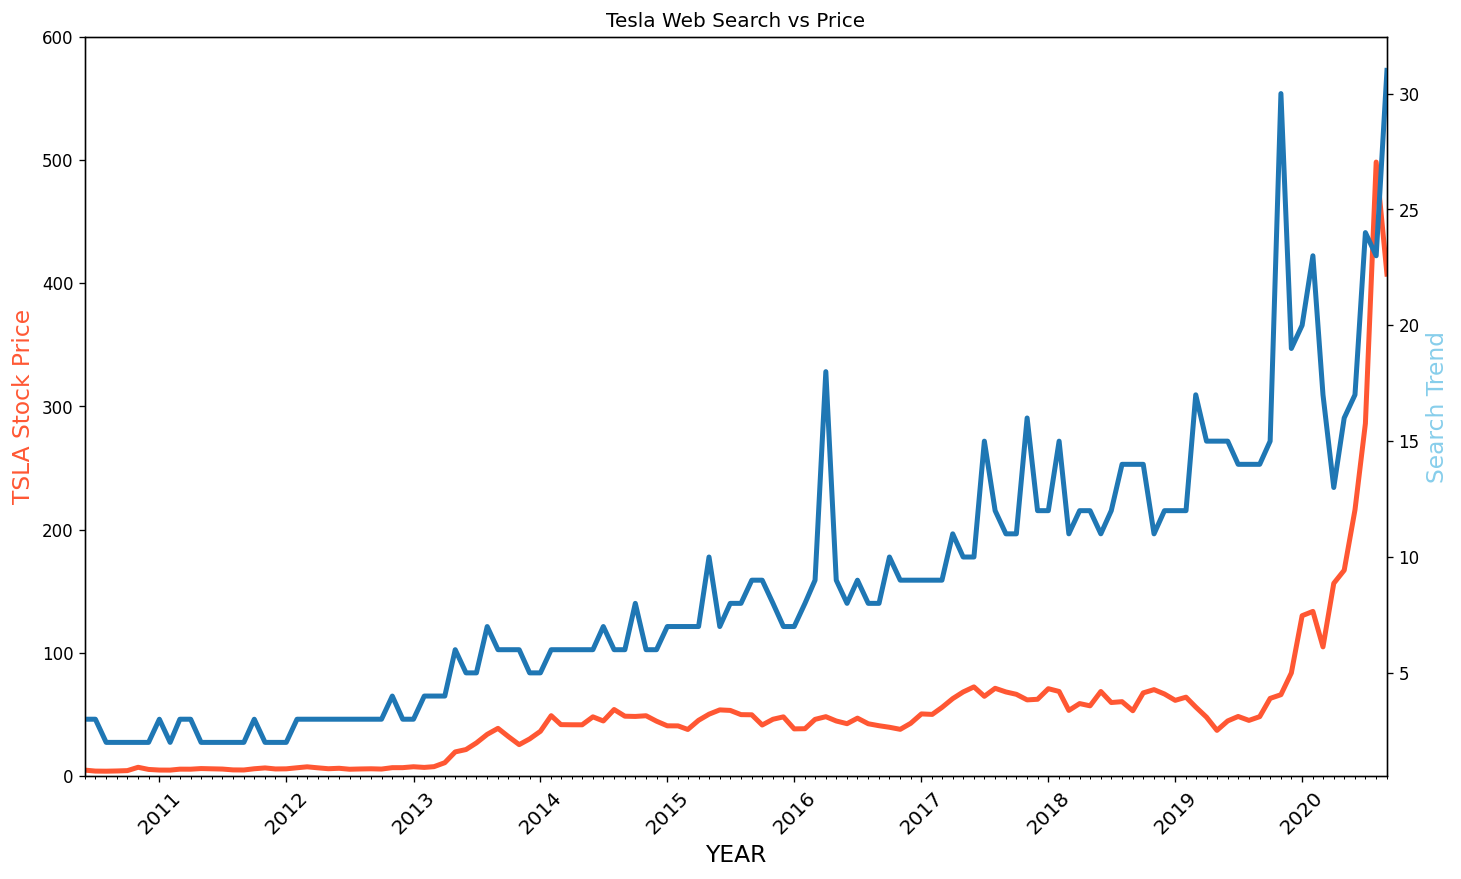

In [99]:
plt.figure(figsize=(14, 8), dpi=120) # this line of code that adjusts the size of the chart must be at the top
plt.title("Tesla Web Search vs Price")

plt.xticks(fontsize=12, rotation=45)

#axes
ax1 = plt.gca()
ax2 = ax1.twinx()

# label all axes
ax1.set_xlabel("YEAR", fontsize=14)
ax1.set_ylabel("TSLA Stock Price",fontsize=14, color="#FF5733")
ax2.set_ylabel("Search Trend",fontsize=14, color="skyblue")

#plotting
ax1.plot(df_tesla['MONTH'], df_tesla['TSLA_USD_CLOSE'], color="#FF5733", linewidth=3)
ax2.plot(df_tesla['MONTH'], df_tesla['TSLA_WEB_SEARCH'], linewidth=3)

#set limits
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla['MONTH'].min(), df_tesla['MONTH'].max()])

#Create locators for ticks on the time axis
year = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

# make ticks on occurences of each month
# ax1.xaxis.set_major_locator(year)
# ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
plt.show()

How to add tick formatting for dates on the x-axis.

In [100]:
# Create locators for ticks on the time axis
year = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")

# set locators
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)



### Bitcoin (BTC) Price v.s. Search Volume


**Goal**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. make the BTC price a dashed line <br>
5. make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

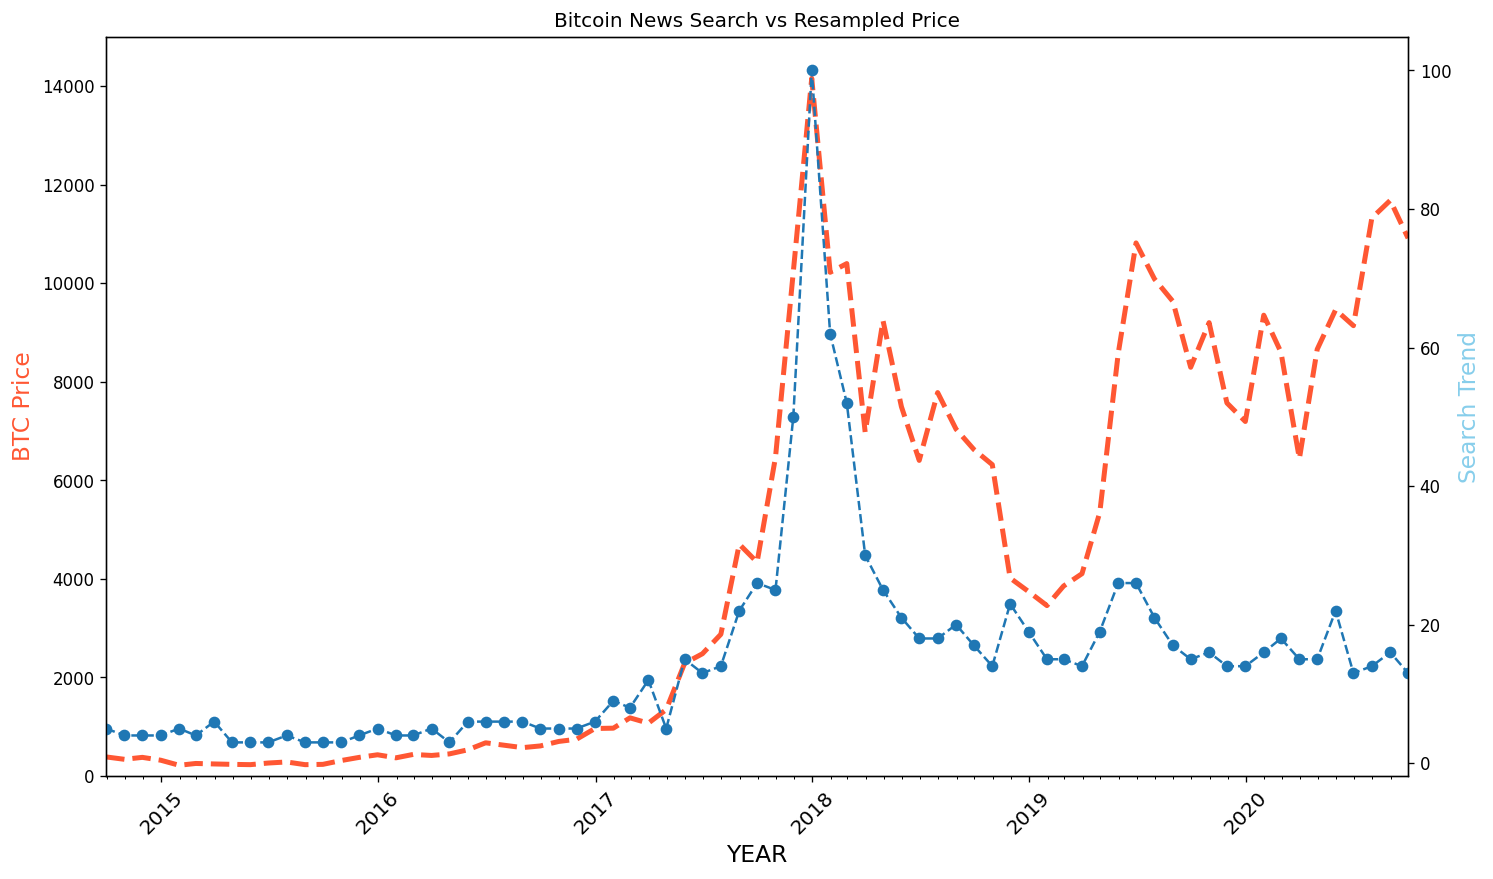

In [101]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title("Bitcoin News Search vs Resampled Price")

plt.xticks(fontsize=12, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.set_xlabel("YEAR", fontsize=14)
ax1.set_ylabel("BTC Price", fontsize=14, color="#FF5733")
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue")

ax1.set_ylim([0, 15000])
ax1.set_xlim(df_btc_monthly.index.min(), df_btc_monthly.index.max())

ax1.plot(df_btc_monthly.index, df_btc_monthly['CLOSE'], "--", color="#FF5733", linewidth=3)
ax2.plot(df_btc_monthly.index, df_btc_search['BTC_NEWS_SEARCH'], "o", linestyle="dashed")

months = mdates.MonthLocator()

ax1.xaxis.set_minor_locator(months)

plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Goal:** Plot the search for "unemployment benefits" against the unemployment rate.
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br>
5. Can you discern any seasonality in the searches? Is there a pattern?

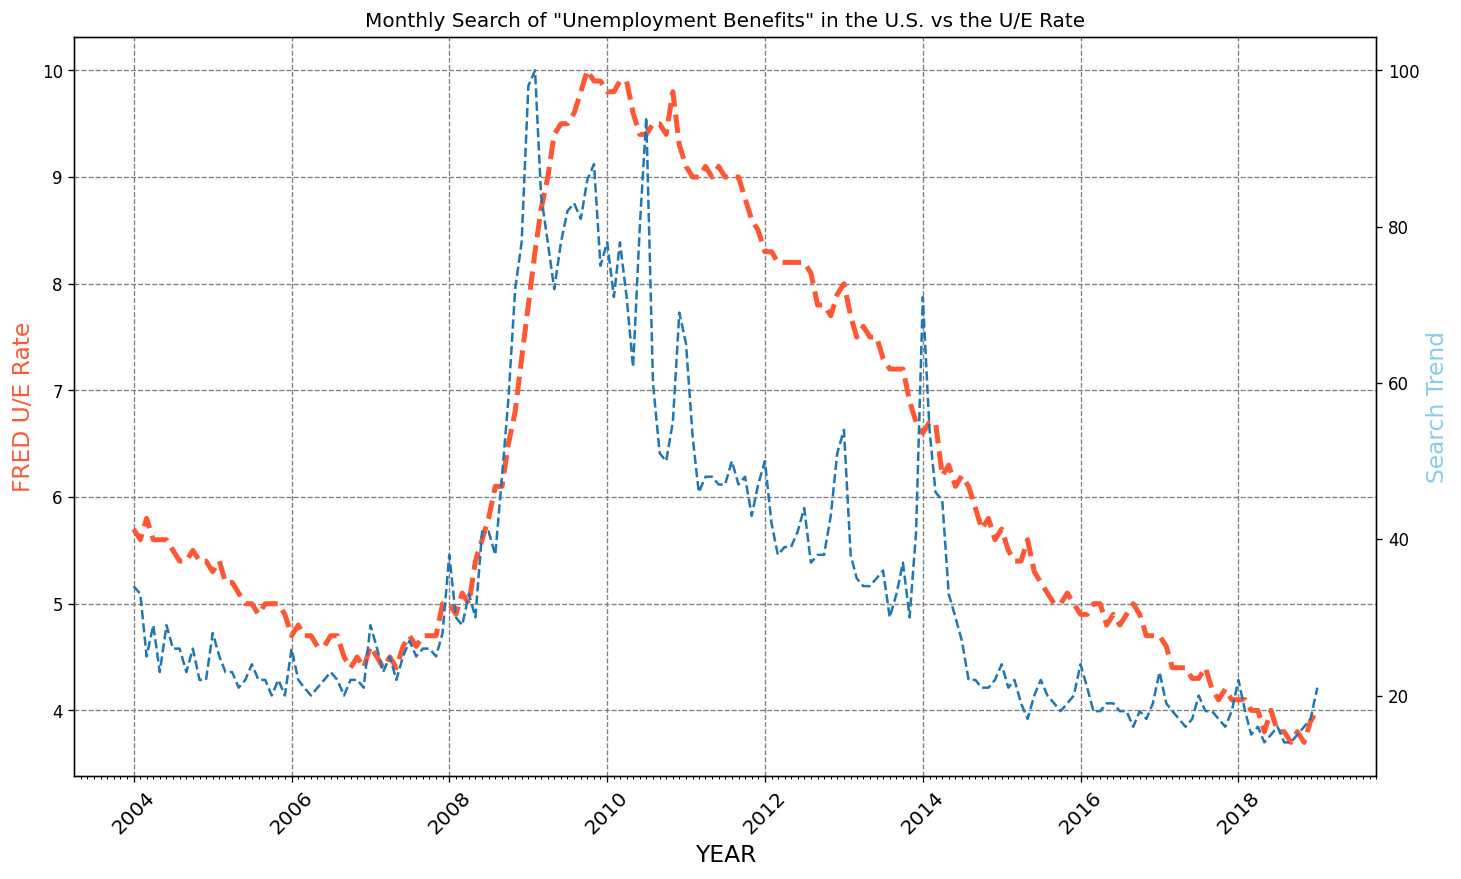

In [102]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=12, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


#add a grey grid
ax1.grid(color='grey', linestyle='--')

ax1.set_xlabel("YEAR", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="#FF5733")
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue")

# ax1.set_xlim()
# ax1.set_ylim()

ax1.plot(df_unemployment['MONTH'], df_unemployment['UNRATE'], "--", color="#FF5733", linewidth=3)
ax2.plot(df_unemployment['MONTH'], df_unemployment['UE_BENEFITS_WEB_SEARCH'], linestyle="dashed")

month = mdates.MonthLocator()

ax1.xaxis.set_minor_locator(month)

**Goal**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment.


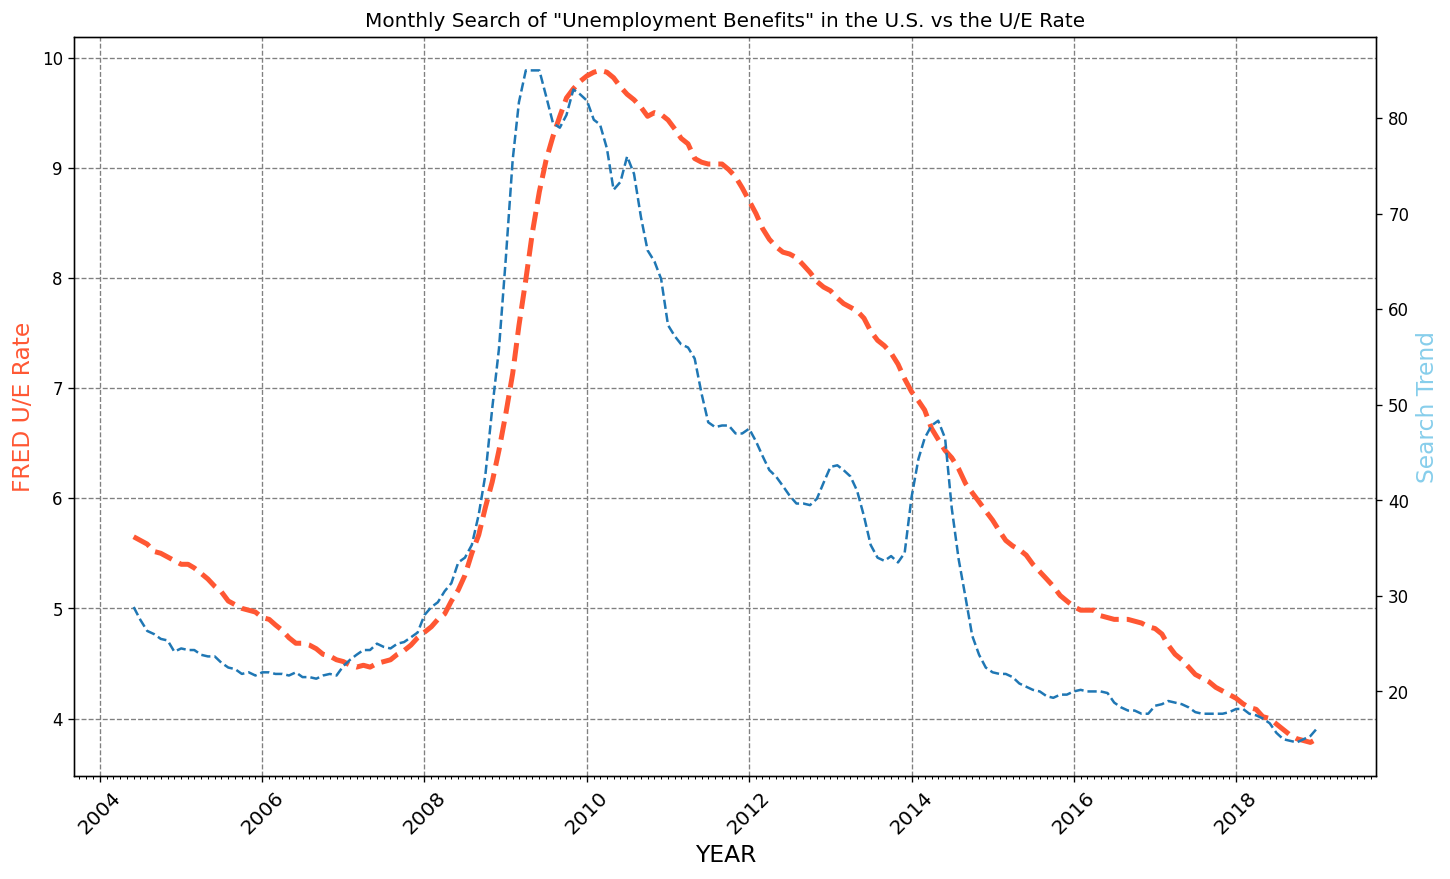

In [103]:
roll_df = df_unemployment[['UNRATE', 'UE_BENEFITS_WEB_SEARCH']].rolling(window=6).mean() # 6-month rolling average for the web searches

plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=12, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


#add a grey grid
ax1.grid(color='grey', linestyle='--')

ax1.set_xlabel("YEAR", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="#FF5733")
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue")

# ax1.set_xlim()
# ax1.set_ylim()

ax1.plot(df_unemployment['MONTH'], roll_df['UNRATE'], "--", color="#FF5733", linewidth=3)
ax2.plot(df_unemployment['MONTH'], roll_df['UE_BENEFITS_WEB_SEARCH'], linestyle="dashed")

month = mdates.MonthLocator()
ax1.xaxis.set_minor_locator(month)

plt.show()

### Including 2020 in Unemployment Charts

**Goal**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart.

In [104]:
df_unemployment_2 = pd.read_csv("/content/data/UE Benefits Search vs UE Rate 2004-20.csv")
df_unemployment_2

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6
...,...,...,...
195,2020-04,100,14.7
196,2020-05,63,13.3
197,2020-06,53,11.1
198,2020-07,54,10.2


In [105]:
df_unemployment_2['MONTH'] = pd.to_datetime(df_unemployment_2['MONTH'])

df_unemployment_2.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,9,5.7
1,2004-02-01,8,5.6
2,2004-03-01,7,5.8
3,2004-04-01,8,5.6
4,2004-05-01,6,5.6


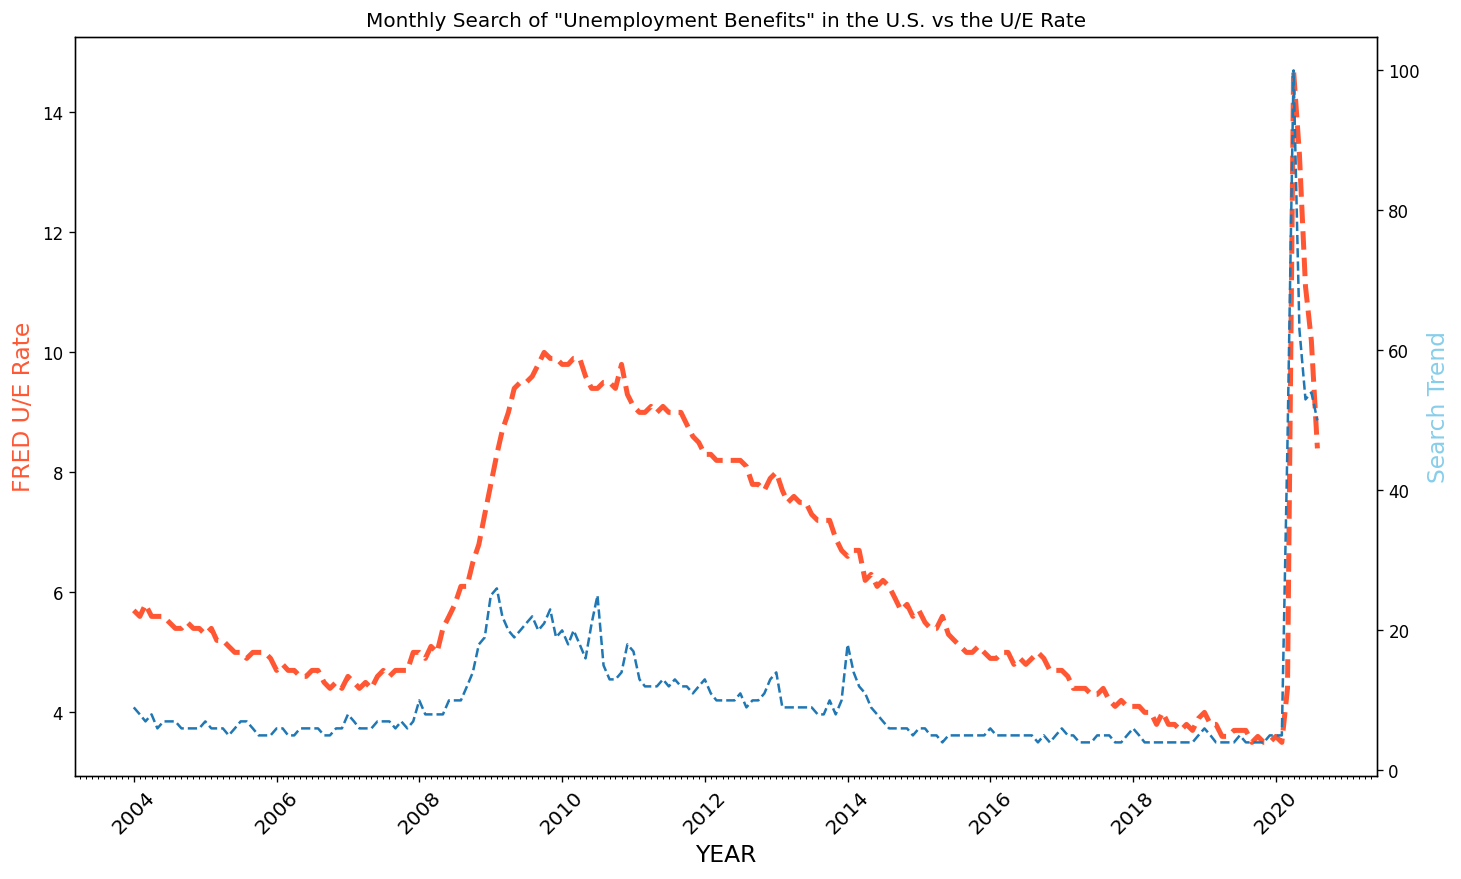

In [106]:
plt.figure(figsize=(14, 8), dpi=120)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate')
plt.xticks(fontsize=12, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()


#add a grey grid
# ax1.grid(color='grey', linestyle='--')

ax1.set_xlabel("YEAR", fontsize=14)
ax1.set_ylabel("FRED U/E Rate", fontsize=14, color="#FF5733")
ax2.set_ylabel("Search Trend", fontsize=14, color="skyblue")

# ax1.set_xlim()
# ax1.set_ylim()

ax1.plot(df_unemployment_2['MONTH'], df_unemployment_2['UNRATE'], "--", color="#FF5733", linewidth=3)
ax2.plot(df_unemployment_2['MONTH'], df_unemployment_2['UE_BENEFITS_WEB_SEARCH'], linestyle="dashed")

month = mdates.MonthLocator()

ax1.xaxis.set_minor_locator(month)

plt.show()